In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [26]:
df = pd.read_csv("prelim_datasets/gameandgrade.csv")

In [27]:
df.head()

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade
0,0,1,1,2,1,1,4,4,5,77.50
1,1,1,1,3,1,1,1,3,3,83.00
2,0,1,0,0,0,0,1,3,3,80.00
3,0,1,3,5,1,1,2,2,3,45.00
4,1,1,1,1,2,1,1,3,4,85.00


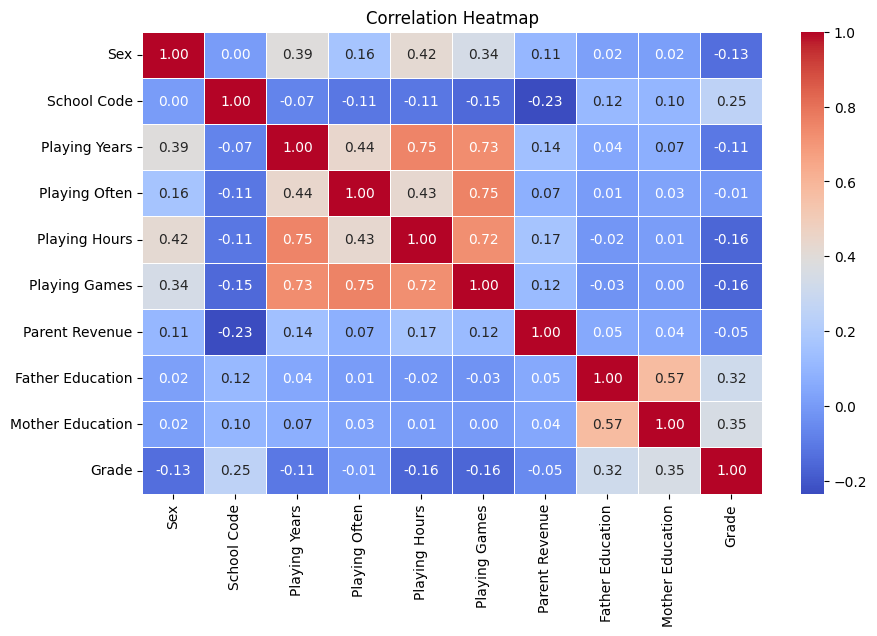

In [28]:
plt.figure(figsize=(10, 6))
df = df.apply(pd.to_numeric, errors='coerce')
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

It seems like Mother Education has better correlation

In [29]:
df["Grade"] = pd.to_numeric(df["Grade"], errors="coerce")
df_cleaned = df.dropna(subset=["Grade"])

In [30]:
best_feature = "Mother Education"
X = df_cleaned[[best_feature]]
y = df_cleaned["Grade"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
slr_model = LinearRegression()
slr_model.fit(X_train, y_train)


LinearRegression()

In [33]:
y_pred_slr = slr_model.predict(X_test)

In [34]:
mae_slr = mean_absolute_error(y_test, y_pred_slr)
rmse_slr = mean_squared_error(y_test, y_pred_slr) ** 0.5
print(f"Simple Linear Regression - Mean Absolute Error (MAE): {mae_slr:.2f}")
print(f"Simple Linear Regression - Root Mean Squared Error (RMSE): {rmse_slr:.2f}")

Simple Linear Regression - Mean Absolute Error (MAE): 13.53
Simple Linear Regression - Root Mean Squared Error (RMSE): 16.55


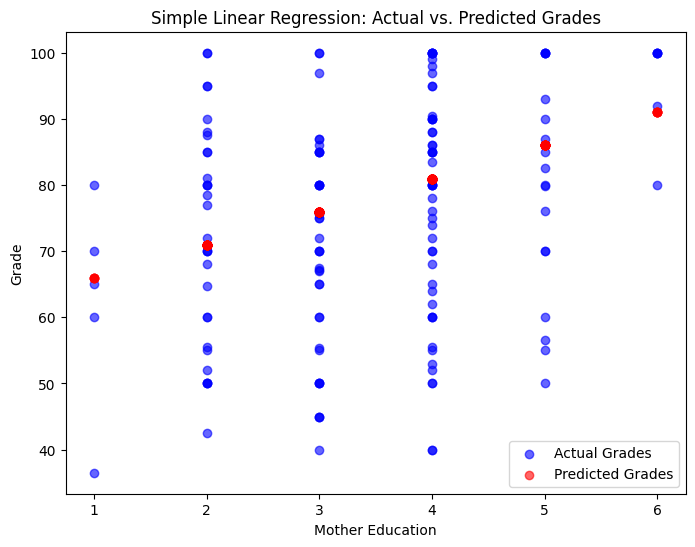

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, alpha=0.6, color="blue", label="Actual Grades")
plt.scatter(X_test, y_pred_slr, alpha=0.6, color="red", label="Predicted Grades")
plt.xlabel(best_feature)
plt.ylabel("Grade")
plt.title("Simple Linear Regression: Actual vs. Predicted Grades")
plt.legend()
plt.show()

In [36]:
mse = mean_squared_error(y_test, y_pred_slr)
r2 = r2_score(y_test, y_pred_slr)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 273.93
R² Score: 0.08
